In [1]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
glove_file = "glove.6B.100d.txt"

In [3]:
embeddings_dict = {}

with open(glove_file, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype="float32")
        embeddings_dict[word] = vector

In [4]:
print("Total words loaded:", len(embeddings_dict))

Total words loaded: 400000


In [5]:
def get_similar_words(word, top_n=5):
    if word not in embeddings_dict:
        return "Word not found in vocabulary"

    word_vector = embeddings_dict[word]
    similarities = {}

    for other_word in embeddings_dict:
        other_vector = embeddings_dict[other_word]
        similarity = np.dot(word_vector, other_vector) / (
            np.linalg.norm(word_vector) * np.linalg.norm(other_vector)
        )
        similarities[other_word] = similarity

    sorted_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[1:top_n+1]


In [6]:
print("Words similar to 'king':")
print(get_similar_words("king"))

Words similar to 'king':
[('prince', 0.7682328), ('queen', 0.750769), ('son', 0.70208883), ('brother', 0.6985776), ('monarch', 0.697789)]


In [7]:
def perform_analogy(word1, word2, word3, top_n=5):
    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        return "One of the words not in vocabulary"

    result_vector = embeddings_dict[word1] - embeddings_dict[word2] + embeddings_dict[word3]

    similarities = {}

    for word in embeddings_dict:
        vector = embeddings_dict[word]
        similarity = np.dot(result_vector, vector) / (
            np.linalg.norm(result_vector) * np.linalg.norm(vector)
        )
        similarities[word] = similarity

    sorted_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[:top_n]


In [8]:
print("Analogy: king - man + woman")
print(perform_analogy("king", "man", "woman"))

Analogy: king - man + woman
[('king', 0.85518366), ('queen', 0.7834413), ('monarch', 0.6933802), ('throne', 0.6833111), ('daughter', 0.6809082)]


In [9]:
words = ["king", "queen", "man", "woman",
         "paris", "france", "berlin", "germany",
         "apple", "microsoft"]

In [10]:
word_vectors = []
valid_words = []

In [11]:
for word in words:
    if word in embeddings_dict:
        valid_words.append(word)
        word_vectors.append(embeddings_dict[word])

word_vectors = np.array(word_vectors)

In [12]:
print("Total valid words:", len(valid_words))

Total valid words: 10


In [13]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

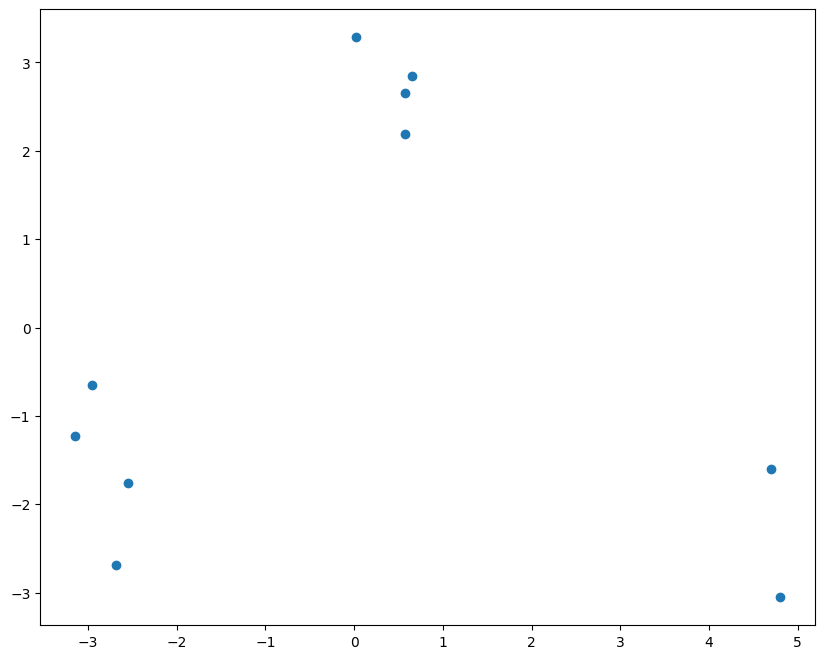

In [14]:
plt.figure(figsize=(10, 8))

x = reduced_vectors[:, 0]
y = reduced_vectors[:, 1]

plt.scatter(x, y)

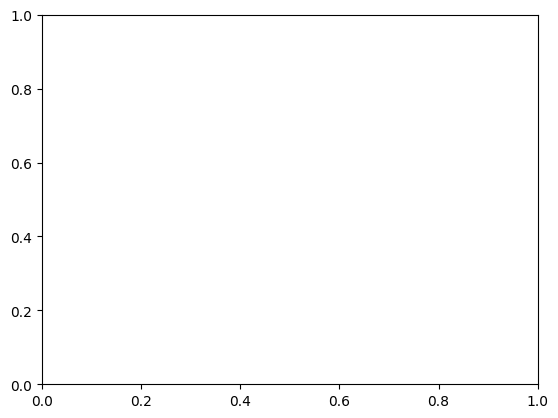

In [15]:
for i, word in enumerate(valid_words):
    plt.annotate(word, (x[i], y[i]), fontsize=10)

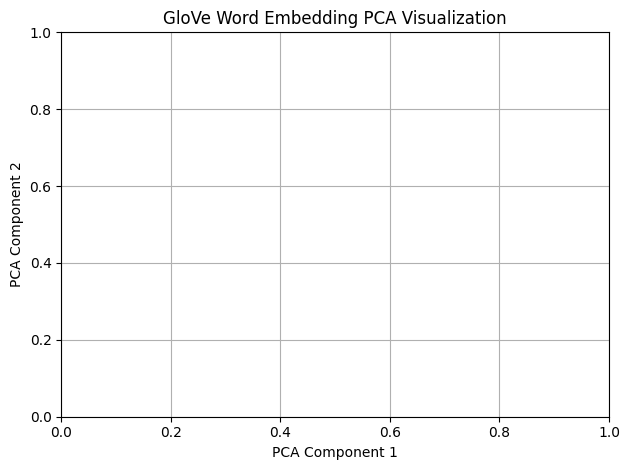

In [16]:
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("GloVe Word Embedding PCA Visualization")
plt.grid(True)
plt.tight_layout()
plt.show()